In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('winequality-red.csv')

In [4]:
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [5]:
data.tail(3)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
data.shape

(1599, 12)

In [8]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1) Target variable ranging from 3 to 8

2) Mean is 5.64 indicating an avg quality among the wines.

3) Significant variations observed in acidity levels ,sugar content,and alcohol concentration.

4) Feature exhabit diverse ranges, means, and standard deviations.

In [11]:
# Checking null or NA values in data set
data.isnull().sum()  # data.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

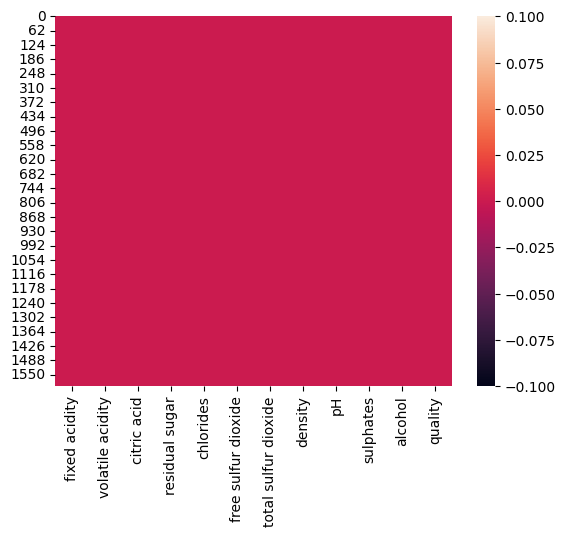

In [12]:
# same null value we can see in heatmap also
sns.heatmap(data.isna())

In [13]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


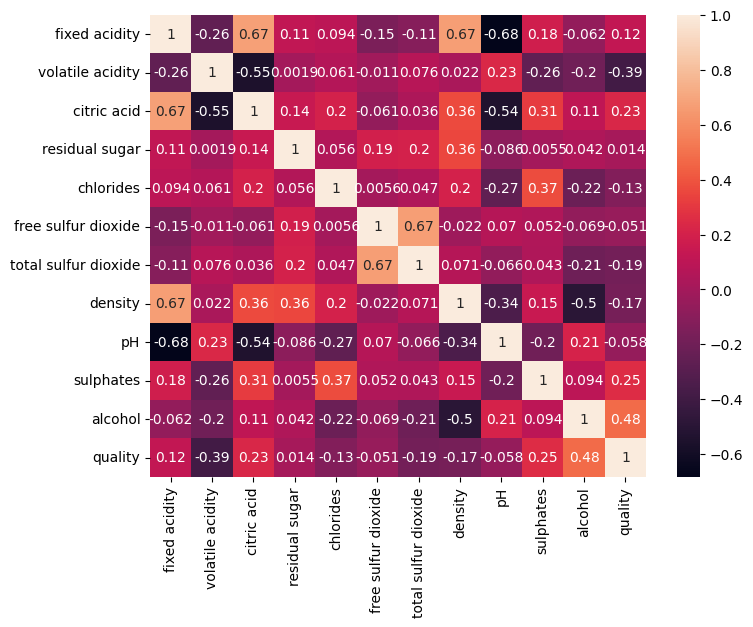

In [14]:
# We can see correlation seen with the help of correlation diagram
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,)
plt.show()

Based On correlation here are some observation

1) Fixed Acidity and Citric Acid have a relatively strong positive correlation.

2) pH and Fixed Acidity have stong -ve correlation.

Checking Outliers in Dataset

<Figure size 1600x1400 with 0 Axes>

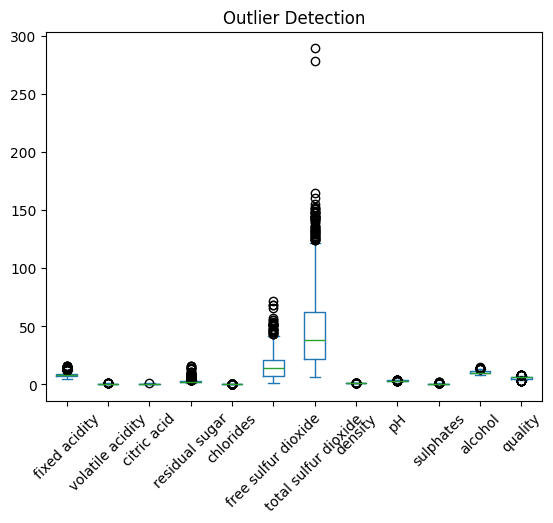

In [16]:
# Box Plots first method outliers detections 
plt.figure(figsize=(16,14))
data.plot(kind='box')
plt.title("Outlier Detection")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

<Axes: ylabel='free sulfur dioxide'>

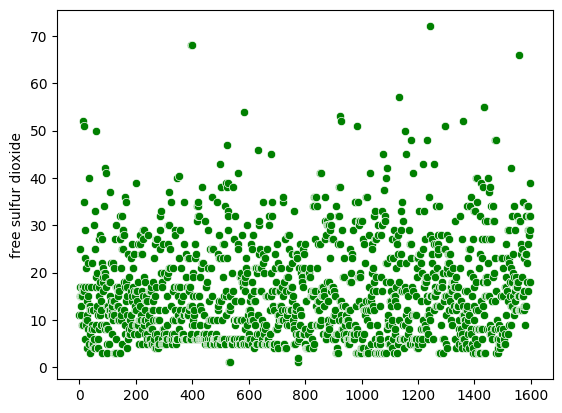

In [17]:
# Scatter plot 
sns.scatterplot(data['free sulfur dioxide'],color='green')

<Axes: ylabel='chlorides'>

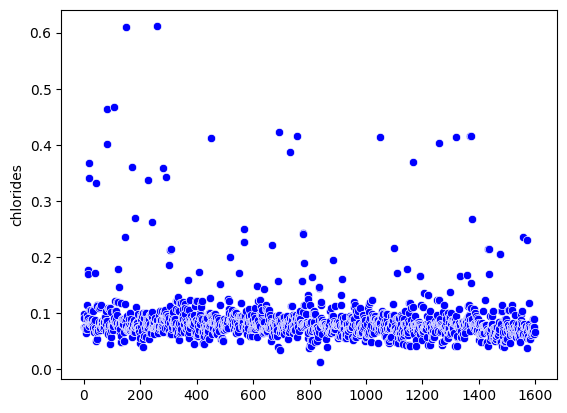

In [18]:
sns.scatterplot(data['chlorides'],color='blue')

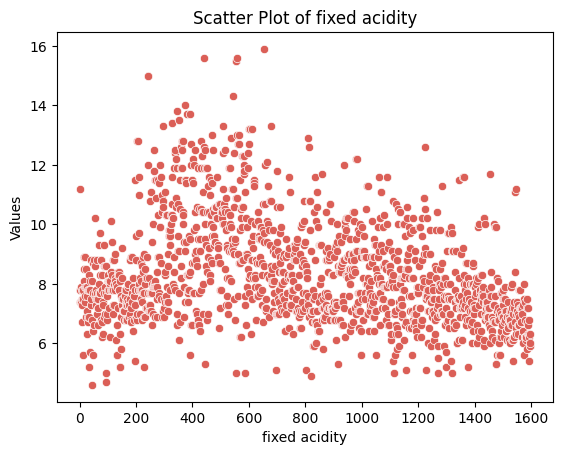

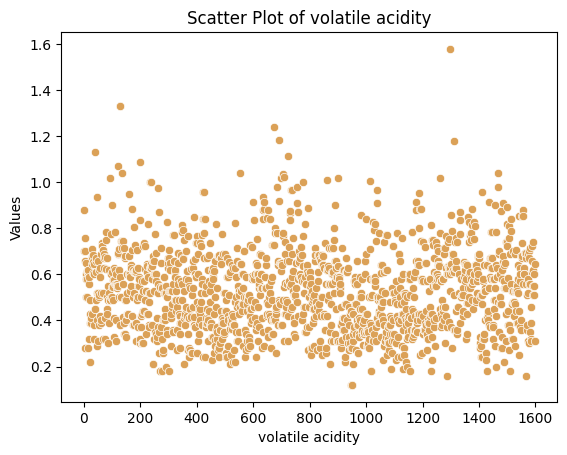

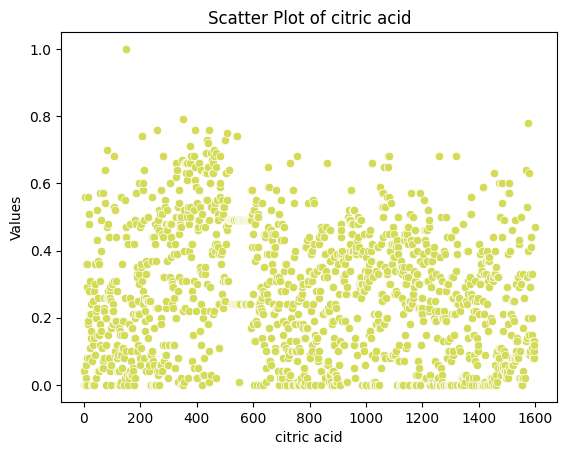

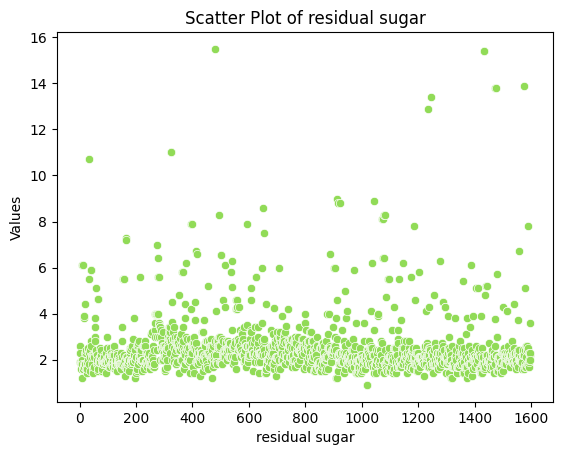

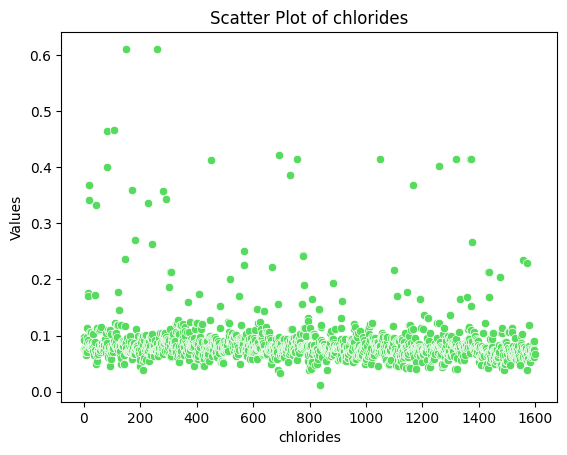

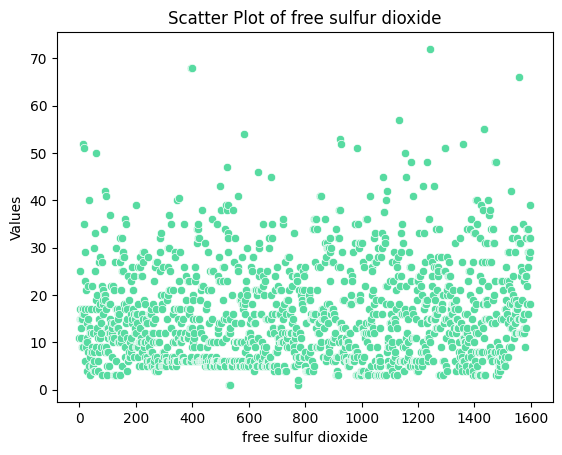

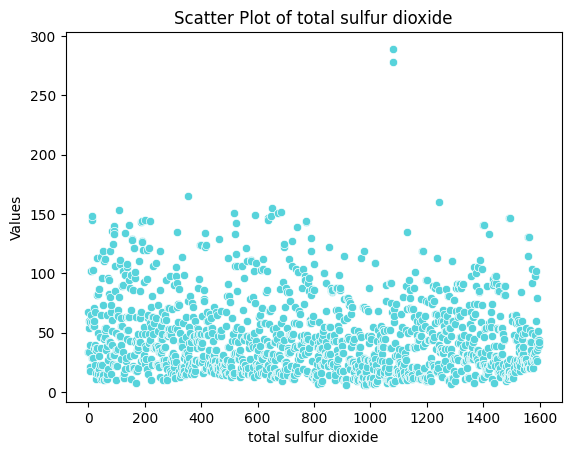

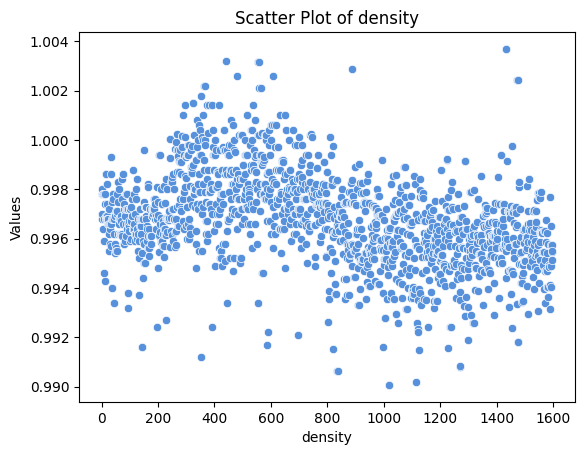

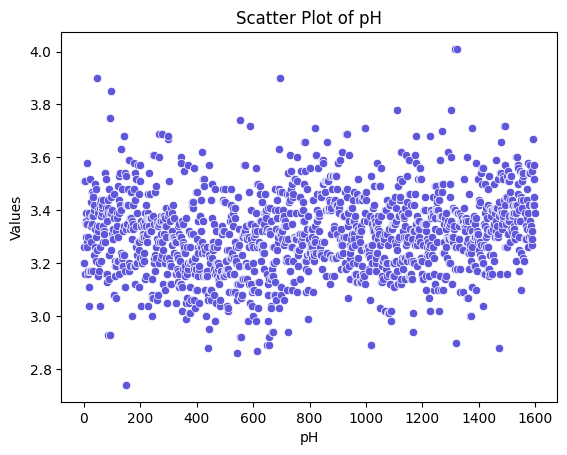

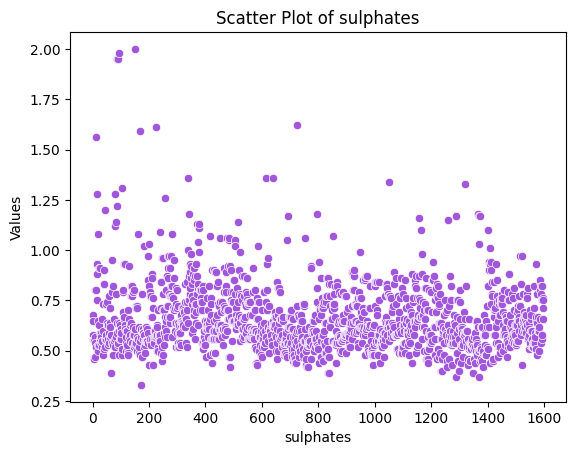

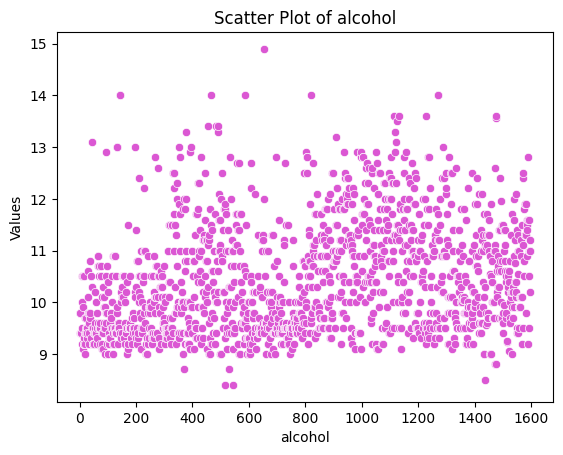

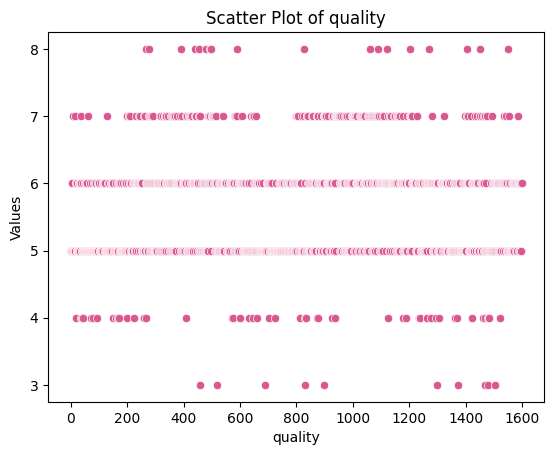

In [19]:
# scatter plots outlier detections 
colors = sns.color_palette('hls', len(data.columns))  # Generate a list of colors
for i, col in enumerate(data.columns):
    plt.figure()
    sns.scatterplot(data=data[col], color=colors[i])
    plt.title(f'Scatter Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
plt.show()


In [20]:
# Method 3 outlier detections
from scipy import stats
zscore = np.abs(stats.zscore(data))
print(zscore)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

From the Boxplot it is clear that every feature having outliers 

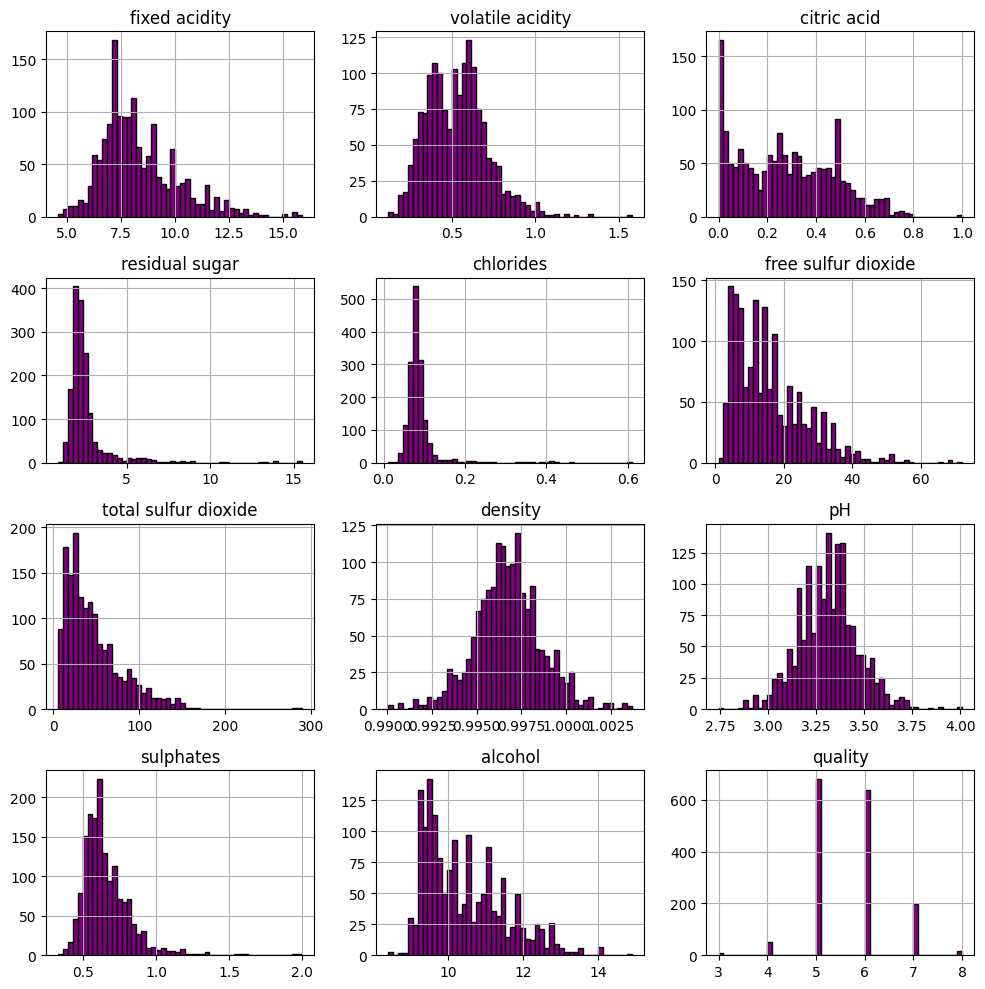

In [21]:
# checking the distribution of data 
data.hist(figsize=(10,10),bins=50,color='purple',edgecolor='black')
plt.tight_layout()
plt.show()

# Removing Outliers from the data 


In [22]:
from scipy import stats
# Dropping the non-numeric colunms 
numeric_cols=data.select_dtypes(include=[np.number]).columns
df_numeric=data[numeric_cols]

# Compute the Z-score for the numeric colounms
zscore = np.abs(stats.zscore(df_numeric))
threshold = 3
print(np.where(zscore > threshold))


(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [23]:
df_numeric = df_numeric.loc[(zscore < 3).all(axis=1)]

<Figure size 1600x1400 with 0 Axes>

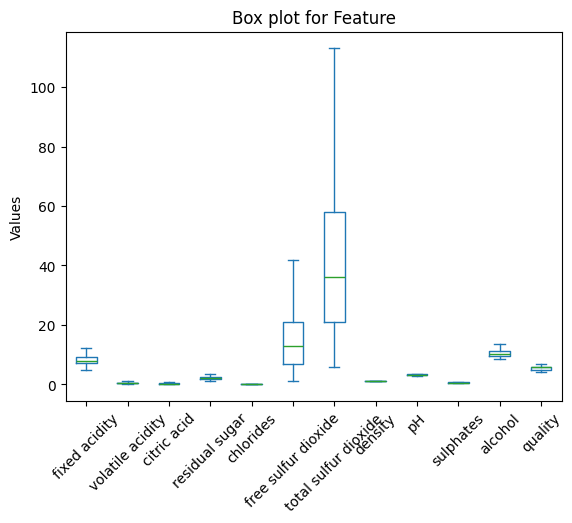

In [24]:
plt.figure(figsize=(16,14))
df_numeric.plot(kind='box', showfliers=False)  # Set showfliers=False to exclude outliers
plt.title('Box plot for Feature')
plt.ylabel('Values')
plt.xticks(rotation=45) 
plt.grid(False)
plt.show()

In [25]:
data.shape

(1599, 12)

In [26]:
df_numeric.shape

(1451, 12)

In [28]:
# Method 2 IQR 

df_iqr=data
Q1 = df_iqr.quantile(0.25)
Q3 = df_iqr.quantile(0.75)

IQR = Q3 - Q1


In [29]:
df_iqr = df_iqr [ ~ ( df_iqr < (Q1 - 1.5 * IQR)) | (df_iqr > (Q3 + 1.5 * IQR))]

<Axes: ylabel='free sulfur dioxide'>

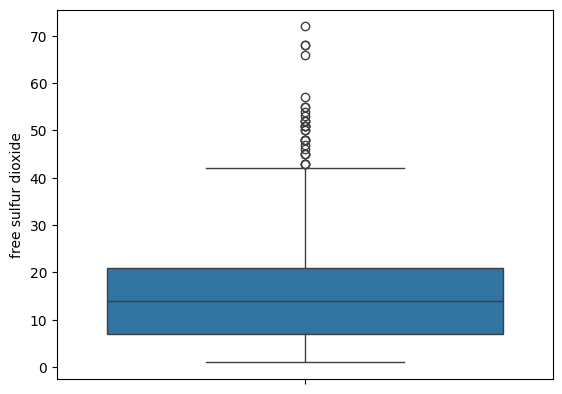

In [30]:
# Method 3 log trasform  
sns.boxplot(data=data['free sulfur dioxide'])


<Axes: ylabel='free sulfur dioxide'>

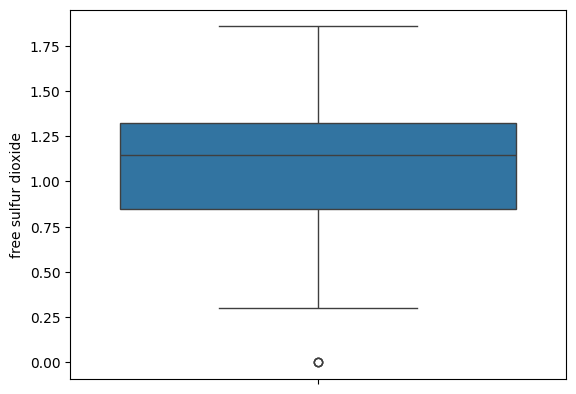

In [31]:
sns.boxplot(data=np.log10(data['free sulfur dioxide']))

<Figure size 1600x1400 with 0 Axes>

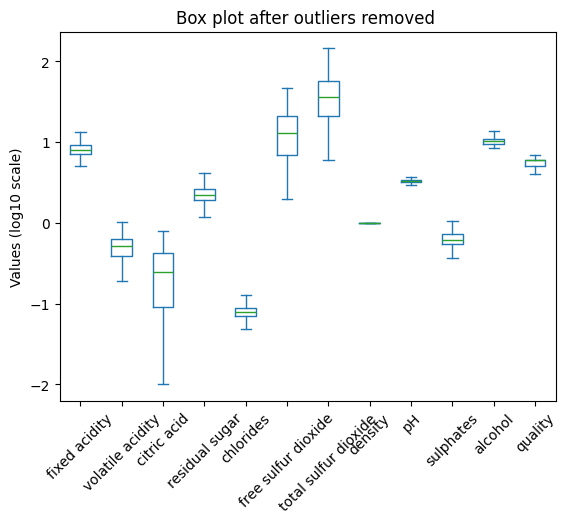

In [32]:
# Method 3 rd ou
plt.figure(figsize=(16,14))
log_df_numeric = np.log10(df_numeric)  # Apply log10 transformation
log_df_numeric.plot(kind='box', showfliers=False)
plt.title('Box plot after outliers removed ')
plt.ylabel('Values (log10 scale)')
plt.xticks(rotation=45) 
plt.grid(False)
plt.show()

# Encoding the Output feature into Bad , Good  and Very Good Quality of wine 


In [33]:
# Define the mapping dictionary for grades
grade_mapping = {
    3: 'Bad',
    4: 'Bad',
    5: 'Good',
    6: 'Good',
    7: 'Very Good',
    8: 'Very Good'
}

# Create a new column 'grade' based on the 'quality' column
data['grade'] = data['quality'].map(grade_mapping)

# Separate feature variables (X) and target variable (Y)
X = data.drop(['quality', 'grade'], axis=1)  # Assuming 'quality' column is not needed as a feature
Y = data['grade']


In [34]:
# See proportion of good vs bad wines
data['grade'].value_counts()

grade
Good         1319
Very Good     217
Bad            63
Name: count, dtype: int64

In [35]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [36]:
Y

0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
1594    Good
1595    Good
1596    Good
1597    Good
1598    Good
Name: grade, Length: 1599, dtype: object

# Important Feature 

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.08049719 0.10893611 0.09477872 0.0802576  0.0747069  0.07289872
 0.08822035 0.08225207 0.06892652 0.10199851 0.14652729]


# Splitting Dataset

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape,Y_train.shape , X_test.shape,Y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

# Model building 

 Logistic Regression 

In [39]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.809375


In [40]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0  11   0]
 [  0 245  17]
 [  0  33  14]]


KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.79375


Suport Vector Classifier

In [42]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.821875


Decision Tree Classifier 

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.834375


In [44]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0  11   0]
 [  0 245  17]
 [  0  33  14]]


Gaussian naive bayes Classifier 

In [45]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))


Accuracy Score: 0.815625


In [46]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0  11   0]
 [  0 245  17]
 [  0  33  14]]


Random Forest Classifier 

In [47]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.878125


In [48]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0  11   0]
 [  0 245  17]
 [  0  33  14]]


# Xgb Classifier 

In [49]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the target variable
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Instantiate the XGBoost classifier
model5 = xgb.XGBClassifier(random_state=1)

# Train the model on the training data
model5.fit(X_train, Y_train_encoded)

# Make predictions on the testing data
y_pred5_encoded = model5.predict(X_test)

# Decode the predictions back to original labels (if needed)
y_pred5 = label_encoder.inverse_transform(y_pred5_encoded)
accuracy = accuracy_score(Y_test, y_pred5)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8625


In [50]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0  11   0]
 [  0 245  17]
 [  0  33  14]]


All Model Perfromance 

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Define the list of models
model_list = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier()
]
# Initialize lists to store model names and accuracies
model_names = []
accuracies = []
# Train and evaluate each model
for model in model_list:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    # Append model name and accuracy to the lists
    model_names.append(model.__class__.__name__)
    accuracies.append(accuracy)
    # Print accuracy for each model
    print(f'{model.__class__.__name__} : {accuracy}')
    print('\n')
# Create a DataFrame from the collected data
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})


LogisticRegression : 0.809375


KNeighborsClassifier : 0.815625


SVC : 0.821875


DecisionTreeClassifier : 0.784375


GaussianNB : 0.815625


RandomForestClassifier : 0.86875




# Model Testing 

In [52]:
def pred(test_value, model):
    test_value_reshaped = test_value.reshape(1, -1)
    prediction = model.predict(test_value_reshaped)
    return prediction

#test_value = np.array([11.2, 0.280, 0.56, 1.9, 0.075, 17.0, 60.0, 0.99800, 3.16, 0.58, 9.8])
test_value = np.array([0.33, 0.20, 0.3, 0.22, 0.1, 2.0, 5.0, 1.0, 3.26, 0.65, 1.8])
predictions = pred(test_value, model2)
print(predictions)

['Good']


Saving the Best Model 

In [53]:
import joblib
from sklearn.ensemble import RandomForestClassifier

#already trained RandomForestClassifier model
# and stored it in a variable named 'model'
# Save the trained model to a file
joblib.dump(model, 'RandomForestClassifier_WineQuality.pkl')

['RandomForestClassifier_WineQuality.pkl']